<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_3_MO_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1> 
<h1><center>Supervised Learning-Foundation Project: ReCell/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---
---


**Marks: 60**

<center><img src="https://hobi.com/wp-content/uploads/2018/09/iStock-910535804.jpg" width="500" height="300"></center>

<b><h2><center> ReCell Case Study</center></h2></b>

# **Problem Statement**

---


---








### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

# **Importing necessary libraries**

---



---






In [ ]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Loading the dataset**

---



---







In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))
#df = pd.read_csv("used_device_data.csv")

Saving used_device_data.csv to used_device_data (1).csv


# **Data Overview**

---



---







The initial steps to get an overview of any dataset is to:

- get information about the number of rows and columns in the dataset
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
-find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
-and check the statistical summary of the dataset to get an overview of the numerical columns of the data
- check for any missing values and treat them if necessary
- check for duplicates




### <font color='green'>**Checking the shape of the dataset**</font>







In [ ]:
# First we will check the shape (number of rows and columns) in the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 3454 rows and 15 columns.


### <font color='green'>**Checking the first and last few rows of the dataset**</font>







In [ ]:
# We will check for the first 5 rows of the dataset
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# and the last 5 rows
df.tail(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


**Observations**:
 - Based on the observed data we can see that there are 15 columns with variables presented in the dictionary.
  - We can see that 4g and 5g columns contain yes/no values.
  - We can also see that some columns have missing values (NaN)

### <font color='green'>**Checking the data types of the columns for the dataset**</font>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**
- We can observe that most of the data in the dataset are numeric in nature ('int64' or 'float' type)
- There are four string ('object'type) columns: brand name, os, 4g, and 5g.

### <font color='green'>**Statistical summary of the dataset**</font>

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations:**
- From the overall review of the statistical data we can see that some of the columns have less values than total. We can also see the mean,the minimum, and the maximum values for each data variable.
-We can also confirm that all numeric columns are present in this output
- We can say that Android is the most frequently used OS.
- There is no specific brand name that is on top of the preference.
- The mean prices for used and new phones is considerably close 4.3 and 5.2 euros.
-The release year for the phones varies from 2013 to 2020., and the usage days range from 91 to 1094 days.

### <font color='green'>**Checking for duplicate values**</font>

In [ ]:
df.duplicated().sum()

0

**Observations**:
- There are no duplicate values in the dataset

### <font color='green'>**Checking for any missing values**</font>

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations**:
 - We can see that there are missing values in 6 columns: main_camera_mp (missing 179), selfie_camera_mp (missing 2), int_memory and ram (missing 4), battery (missing 6), and weight (missing 7). 
 -We will treat these missing values after understanding the distributions of features in the data and the relationships that exist in the data. This will help us impute these values more effectively.

# **Exploratory Data Analysis** (EDA)

---



---



- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- While processing the EDA, we will try to answer the questions mentioned below.


**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**First, we will check for each variable separately (Univariate Analysis) and then will work on analysing the relationships between them (Bivariate Analysis)**

## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="green"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="green"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="mako",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='green'>**Normalized_Used_Price**</font>

Sample Mean = 4.364712079133227
Sample Minimum = 1.536867219599265
Sample Maximum = 6.619433001642933


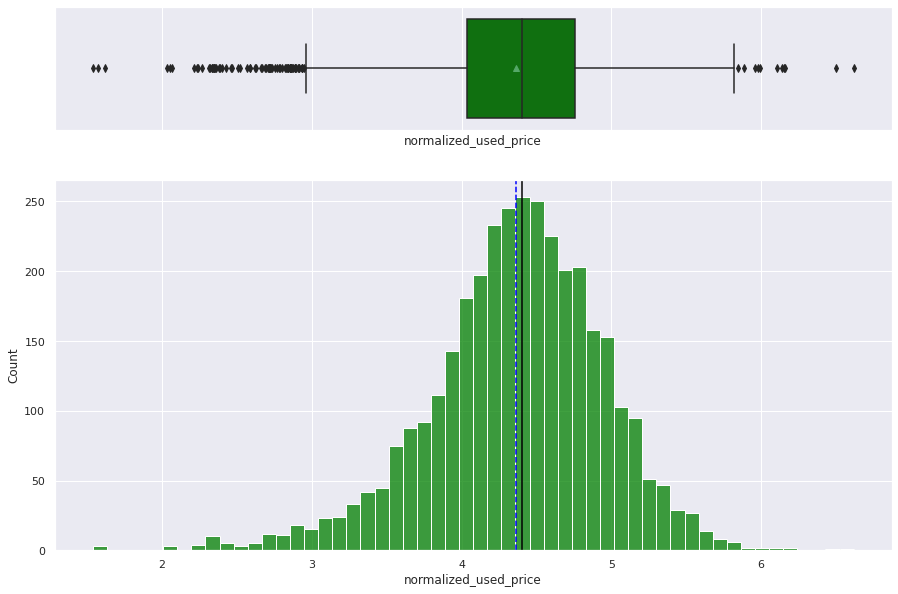

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "normalized_used_price")
print('Sample Mean =',df['normalized_used_price'].mean())
print('Sample Minimum =',df['normalized_used_price'].min())
print('Sample Maximum =',df['normalized_used_price'].max())
plt.show()

**Observations:**
 - We can see from the visual data that **normalized_used_price** variable is close to normally distributed, with the mean price being around 4 euros. There are some outliers above the maximum price of 6 euros, and outliers mainly below the minimum value of 1.5 euros. 

### <font color='green'>**Normalized_New_Price**</font>

Sample Mean = 5.233107171901414
Sample Minimum = 2.9014215940827497
Sample Maximum = 7.847840659422009


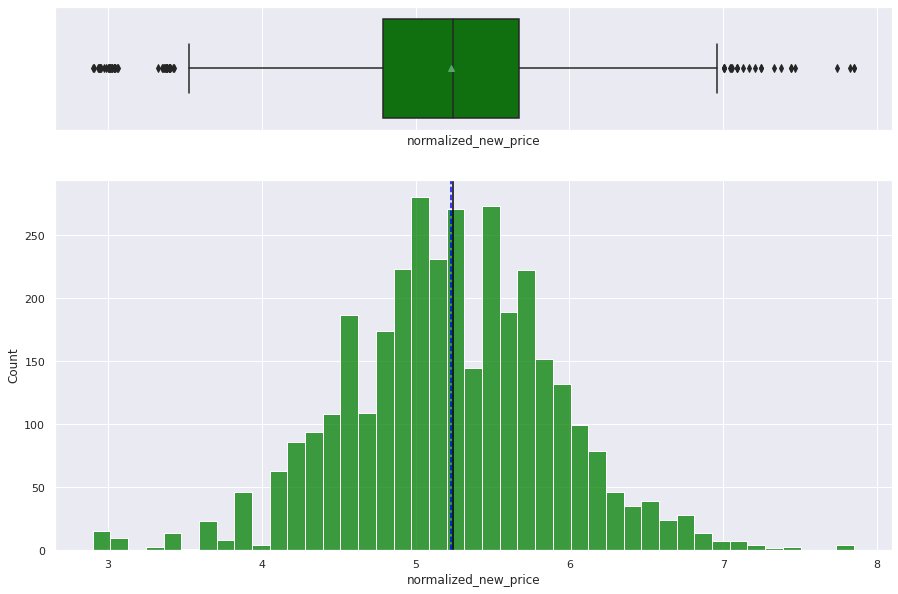

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "normalized_new_price")
print('Sample Mean =',df['normalized_new_price'].mean())
print('Sample Minimum =',df['normalized_new_price'].min())
print('Sample Maximum =',df['normalized_new_price'].max())
plt.show()

**Observations:**

We can observe from the visual data that **normalized_new_price** variable is considerably normally distributed, with the mean price being around 5 euros. There are outliers above the maximum price of 7 euros, and below the minimum 
value of 2 euros.

### <font color='green'>**Screen_Size**</font>

Sample Mean = 13.713115228720325
Sample Minimum = 5.08
Sample Maximum = 30.71


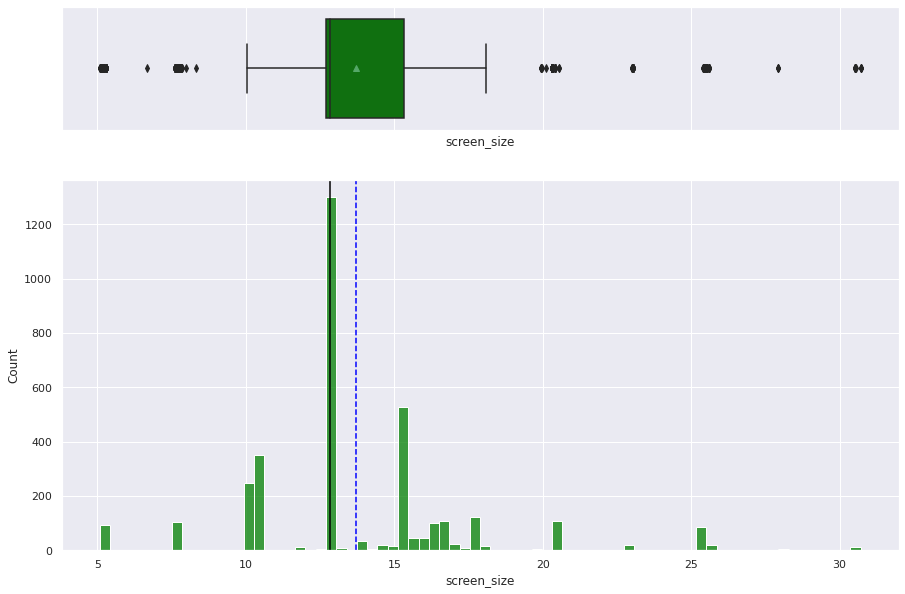

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "screen_size")
print('Sample Mean =',df['screen_size'].mean())
print('Sample Minimum =',df['screen_size'].min())
print('Sample Maximum =',df['screen_size'].max())
plt.show()

**Observations**:
- We can observe from the visual data that **screen_size** variable is positively skewed, with the mean measure being 13 cm. There are outliers above the maximum size of 30 cm, and below the minimum size of 5 cm.

### <font color='green'>**Main_Camera_MP**</font>

Sample Mean = 9.460207633587787
Sample Minimum = 0.08
Sample Maximum = 48.0


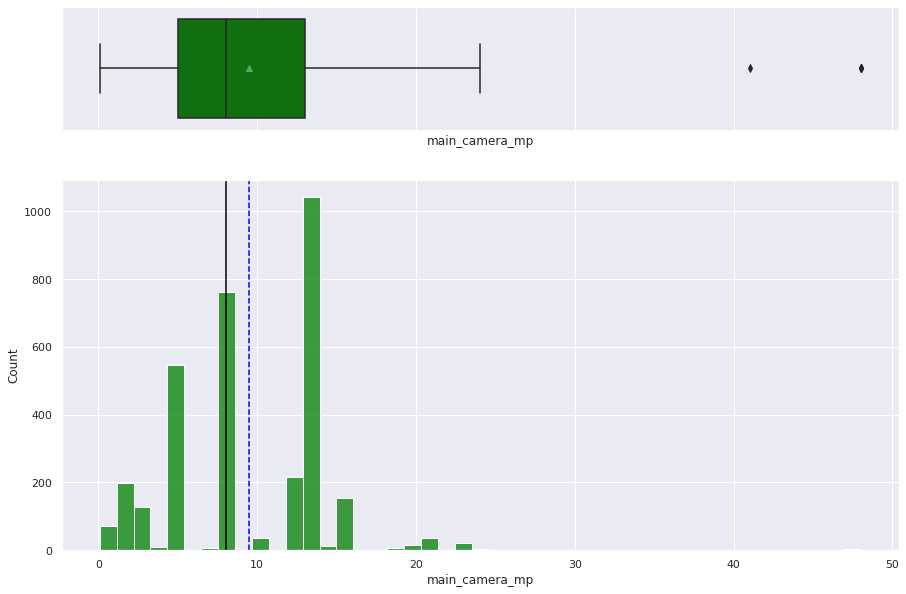

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "main_camera_mp")
print('Sample Mean =',df['main_camera_mp'].mean())
print('Sample Minimum =',df['main_camera_mp'].min())
print('Sample Maximum =',df['main_camera_mp'].max())
plt.show()

**Observations**:
- We can observe from the visual data that **main_camera_mp** variable is  skewed towards right, with the mean measure being 9 megapixels. There are two outliers above the maximum megapixel of 48. 

### <font color='green'>**Selfie_Camera_MP**</font>

Sample Mean = 6.554229432213209
Sample Minimum = 0.0
Sample Maximum = 32.0


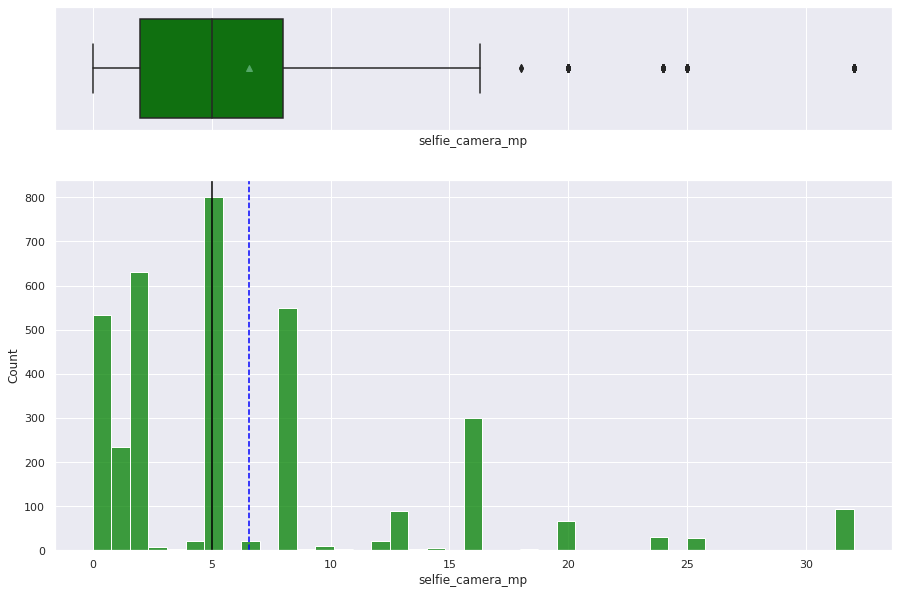

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "selfie_camera_mp")
print('Sample Mean =',df['selfie_camera_mp'].mean())
print('Sample Minimum =',df['selfie_camera_mp'].min())
print('Sample Maximum =',df['selfie_camera_mp'].max())
plt.show()

**Observations:**
- The distribution of the selfie-camera-mp is right-skewed, and most of the values lying below 7-7.5 megapixels. We can also observe the outliers above the maximum value of 32 megapixels.


### <font color='green'>**Int_Memory**</font>

Sample Mean = 54.57309855072464
Sample Minimum = 0.01
Sample Maximum = 1024.0


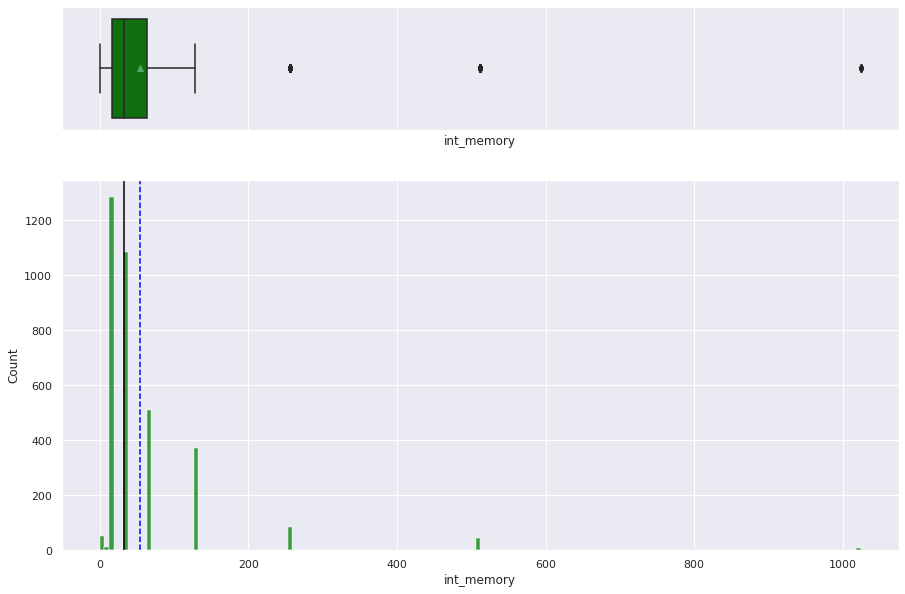

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "int_memory")
print('Sample Mean =',df['int_memory'].mean())
print('Sample Minimum =',df['int_memory'].min())
print('Sample Maximum =',df['int_memory'].max())
plt.show()

**Observations:**
- The data is slightly right-skewed and there are three major outliers that lie far above the maximum int-memory value of ROM in GB. 


### <font color='green'>**Ram**</font>

In [ ]:
# Let's check the percent share of the RAM values:
df['ram'].value_counts(normalize=True)

4.00     0.815942
6.00     0.044638
8.00     0.037681
2.00     0.026087
0.25     0.024058
3.00     0.023478
1.00     0.009855
12.00    0.005217
0.02     0.005217
0.03     0.004928
0.50     0.002609
1.50     0.000290
Name: ram, dtype: float64

Sample Mean = 4.036121739130435
Sample Minimum = 0.02
Sample Maximum = 12.0


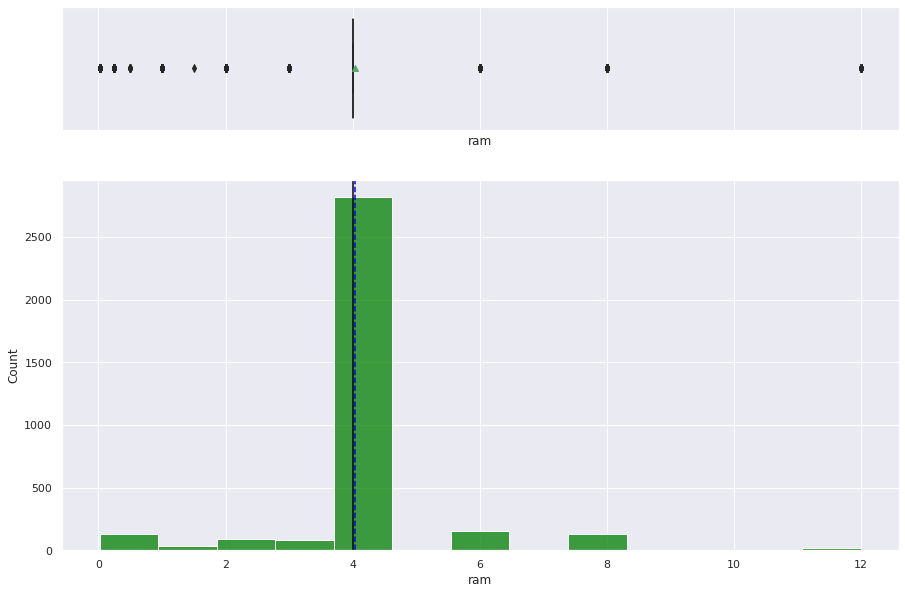

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "ram")
print('Sample Mean =',df['ram'].mean())
print('Sample Minimum =',df['ram'].min())
print('Sample Maximum =',df['ram'].max())
plt.show()

**Observations:**
- It is interesting to see that most devices (2500 count/81%) have 4 GB of RAM, with a few outliers below and above 4 GB.

### <font color='green'>**Weight**</font>

Sample Mean = 182.75187119234116
Sample Minimum = 69.0
Sample Maximum = 855.0


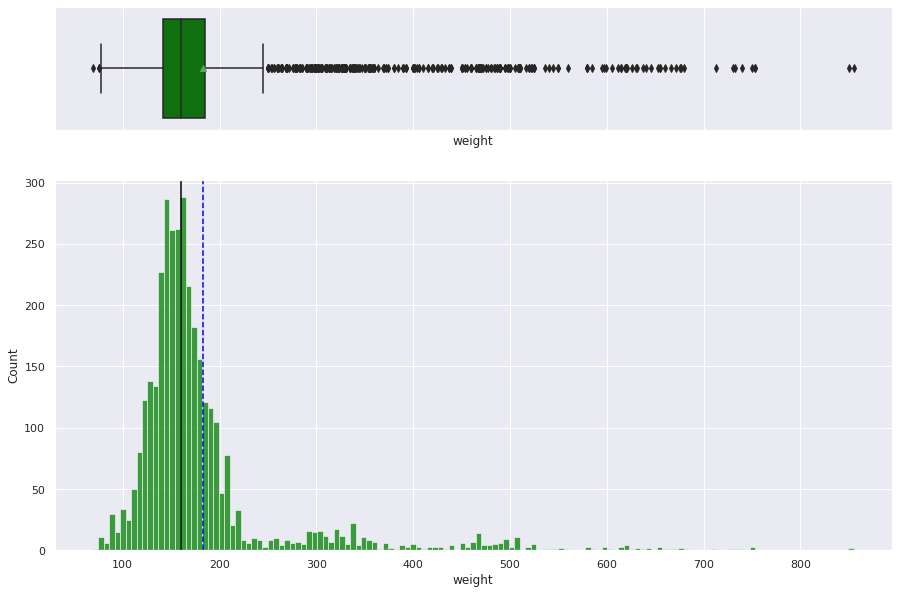

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "weight")
print('Sample Mean =',df['weight'].mean())
print('Sample Minimum =',df['weight'].min())
print('Sample Maximum =',df['weight'].max())
plt.show()

**Observations:**
- With the average weight of the phones being 182 grams, we can see that the data is almost normally distributed. There are a lot of outliers exceeding the maximum weight of 855 grams. 


### <font color='green'>**Battery**</font>

Sample Mean = 3133.402697215777
Sample Minimum = 500.0
Sample Maximum = 9720.0


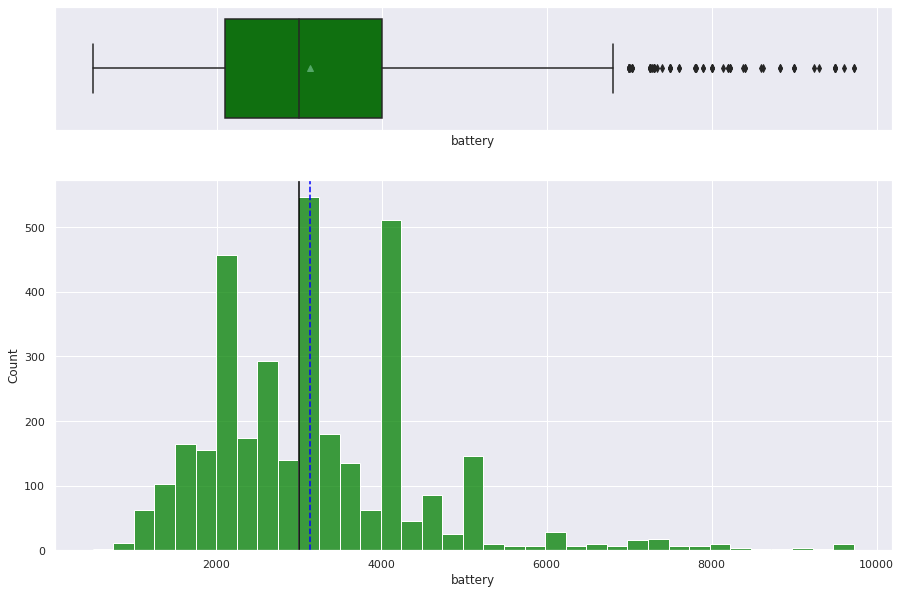

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "battery")
print('Sample Mean =',df['battery'].mean())
print('Sample Minimum =',df['battery'].min())
print('Sample Maximum =',df['battery'].max())
plt.show()

**Observations:**
 - The distribution of the battery power is slightly right skewed, with the mean power being 3133 mAh. There are outliers the lie above the maximum of 9720 mAh.

### <font color='green'>**Days Used**</font>

Sample Mean = 674.8697162709901
Sample Minimum = 91
Sample Maximum = 1094


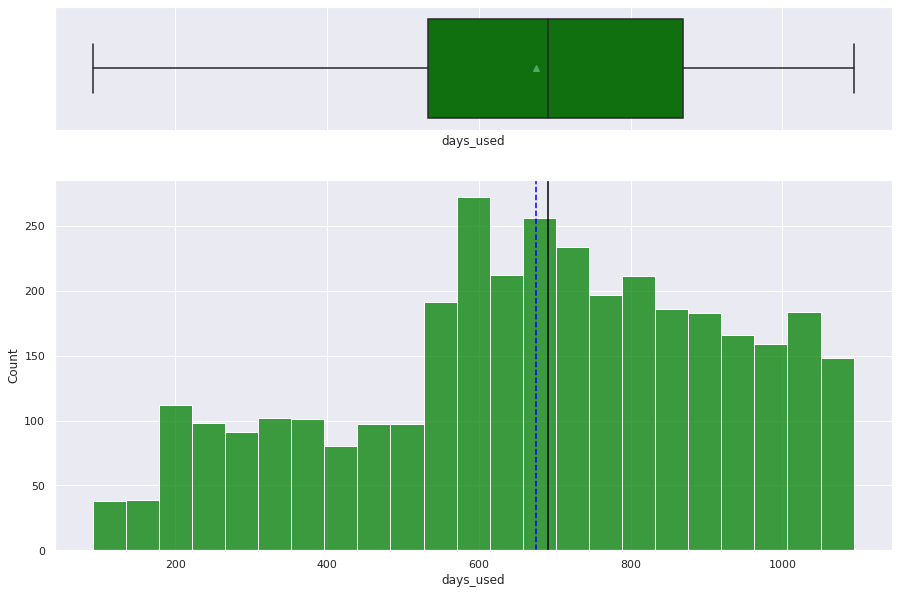

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(df, "days_used")
print('Sample Mean =',df['days_used'].mean())
print('Sample Minimum =',df['days_used'].min())
print('Sample Maximum =',df['days_used'].max())
plt.show()

**Observations:**
 -The days used distribution is slightly skewed to the left, meaning the most of the values lie above the average days of 674 days of usage. With the minimum and maximum usage days being 91 and 1094 respectfully, there are not outliers in the dataset.

### <font color='green'>**Brand Name**</font>

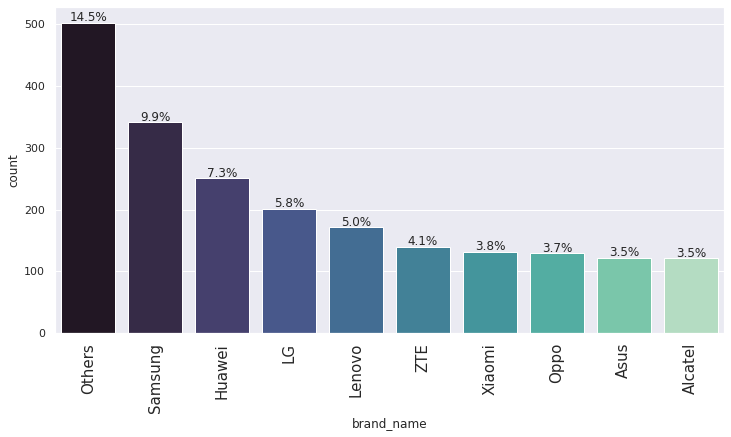

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations:**
- While there are some popular brand names in the market: Samsung:9%, Huawei:7.3%, LG: 5.8%. and Lenovo: 5.0%, majority of the used techonogy is not from the known brand names, that are listed under "other" categorie and comprise 14.5% of the market.

### <font color='green'>**OS**</font>

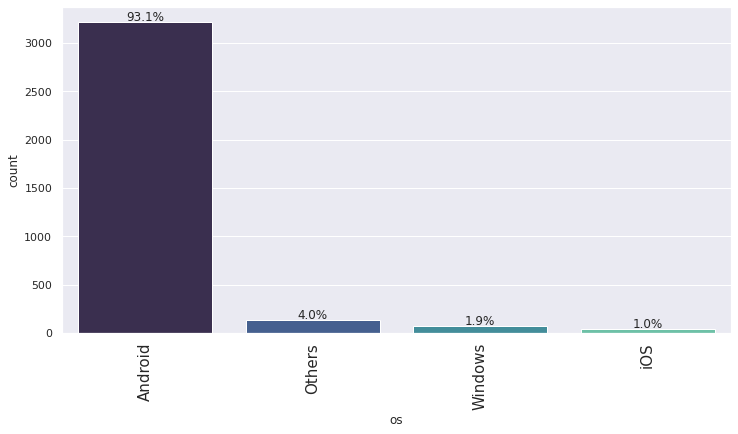

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(df, "os", perc=True, n=10)

**Observations:**
- Android is the major operating system in the market, comprising 93% of the share. Windows and iOS only come after "other" OS systems, which leaves them only 1.9% and 1.0% of market share respectfully.

### <font color='green'>**4g**</font>

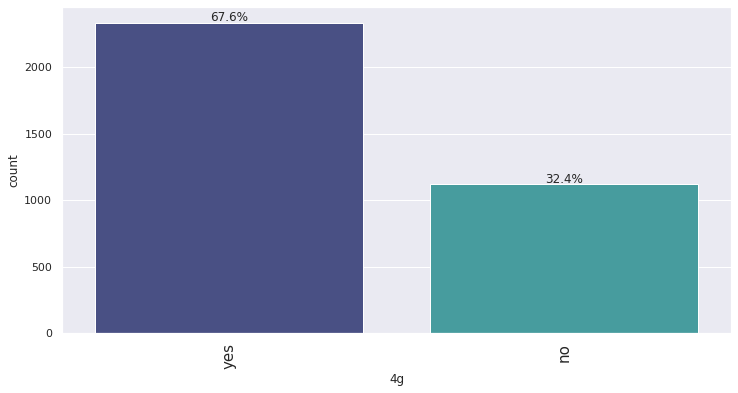

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(df, "4g", perc=True, n=10)

**Observations:**
- 4G network is available in 67.6% of the devices.

### <font color='green'>**5g**</font>

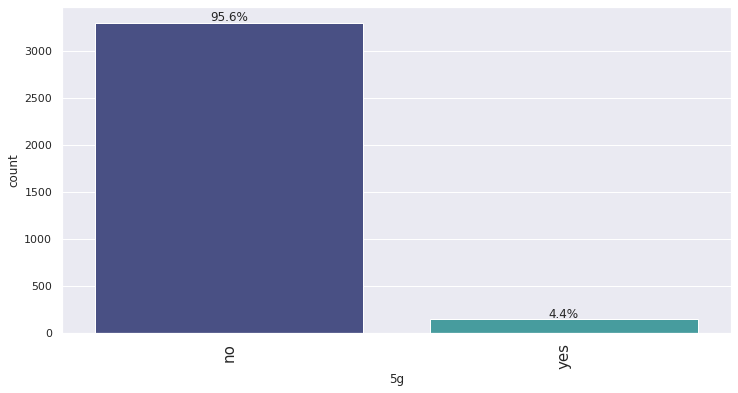

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(df, "5g", perc=True, n=10)

**Observations:**
 - Only 4.4% of the devices in the market have the 5G network availability.

### <font color='green'>**Release Year**</font>

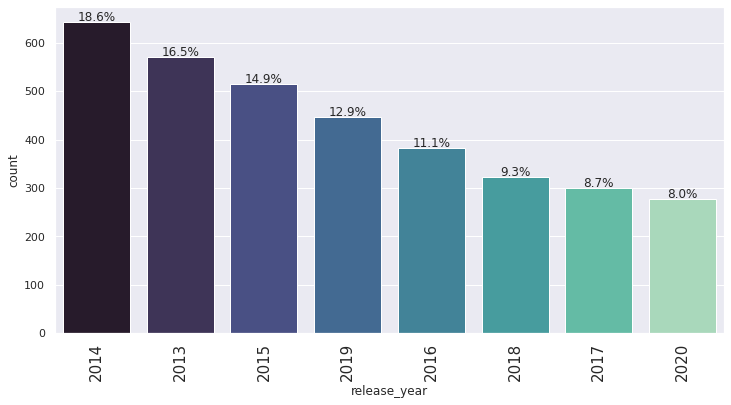

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(df, "release_year", perc=True, n=10)

**Observations:**
 - Devices in the dataset have release dates starting from 2013 to 2020. Almost 50% of the devices were released during 2013-2015.

## **Bivariate Analysis**

### <font color='green'>**Correlation Check**</font>

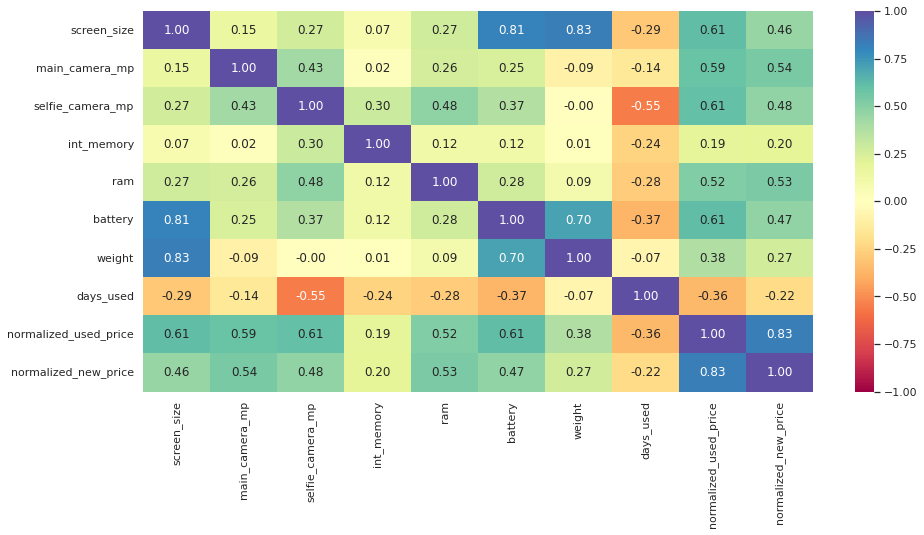

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- According to the correlation check among all the variables, the highest correlations exist in logically expected variables such as normalized_new_ price vs normalized_used_price; battery power vs screen size, and device weight vs screen size. 

- It is interesting to note that screen size, battery power, and camera (main and selfie) have stronger correlations to the normalized_used_prices than to the normalized_new_prices. Main camera mp and RAM seem to be the two variables that have stronger correlation to the normalized_new_prices.

- Interestingly, days_of_use has a negative correlation to the price of the used devices, as well as to all other variables across the dataset.


### <font color='green'>**Amount of RAM Across Brands**</font>

*The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.*

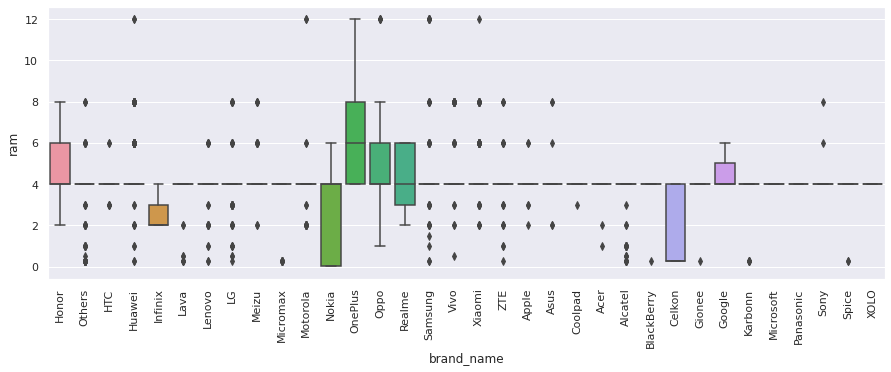

In [ ]:
# Let's run a boxplot that includes the brand names and the ram sizes of the devices:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations:**
 - We can see that while some brands offers only less than average RAM storage options: **Nokia, Celkon, Infinix**; and some brands are only go with above average Rams:**OnePlus, Oppo, Honor, and Google**.
 - Some brands, such as **Samsung and Huawei** have most RAM choices in their device options.    

### <font color='green'>**Devices Which Offer a Large Battery Power**</font>

*Battery power is one of the most important features customers look for. It is an imporant quality to allow their devices work longer without needing a charge.*

In [ ]:
# First, let us check how many devices have more than 4500 mAh battery power:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

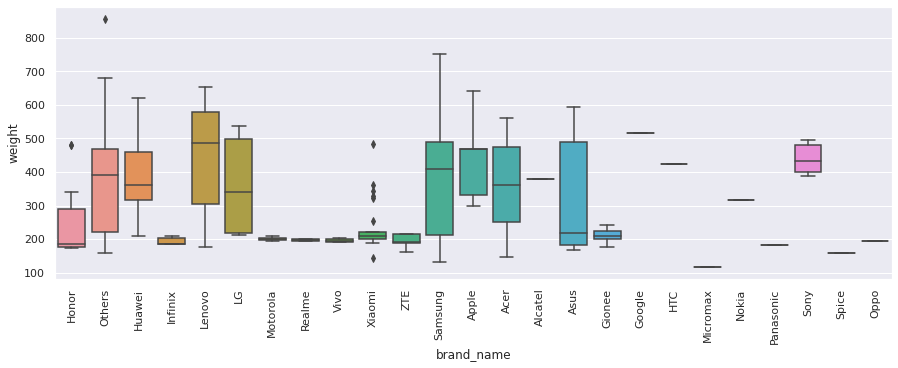

In [ ]:
# Now, let's check how weight differs for large battery devices on different brand names:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

**Observations:**
 - There are **341** devices with 15 more than 4500 mAh battery power options in the dataset.
 - We can see that some brands are very solid with the weight of the devices, such as **Motorola, Realme, and Vivo,** keeping the weight of their devices to around 200 grams. 
 -**Samsung, Asus, Lenovo, and Huawei** have more weight options for their large battery devices.
 - We can say that brands such as **Sony, Google and HTC** have very limited higher weight options for their large battery phones.
 -"**Other**" brands have more weight options to choose from.   

### <font color='green'>**Devices with Large Screens**</font>

*Some people may prefer devices mainly for entertainment and choose devices with larger screens.*

In [ ]:
# Let's filter out the devices with larger screen size:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

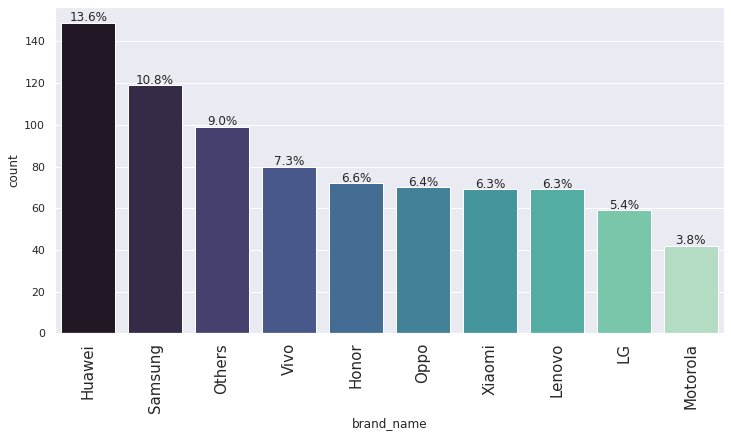

In [ ]:
# Now, we can see the brand distribution for larger screen devices:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)

**Observations:**
- There are **1099** devices in the dataset with larger than 6*2.54 screen size.
- **Huawei** has the largest amount of devices with large screens, comprising almost 14% of the large screen dataset. **Samsung** is the second brand with around 10% of the large screen devices. The "**Other**" group of devices comes after Samsung, with 9% of the large screen devices.

### <font color='green'>**Devices with Good Selfie Cameras**</font>

*Some customers specifically prefer devices with a higher pixel front and main camera features to be able capture their favorite moments and share with their friends*.

In [ ]:
# Let's filter the devices with front camera pixel higher than 8 megapixel:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

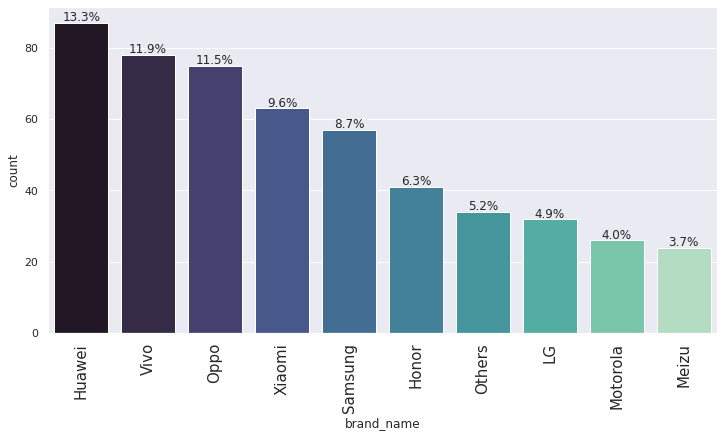

In [ ]:
# Now, we can see the brand distribution for high selfie devices:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10)

**Observations:**
- There are **655** devices with 15 higher than 8 megapixel front cameras.
- **Huawei** brand has most of the devices, 13.3%,  within the high front camera group, followed by **Vivo** (12%) and **Oppo** (11.5%).
-  Huawei, Vivo, Oppo, Xiaomi, and Samsung will comprise almost **50%** of the high pixel selfie camera market group.

### <font color='green'>**Devices with High Resolution Rear Cameras**</font>

*Generally, rear cameras have better resolutions. Setting the threshold higher will give us a better picture.*

In [ ]:
# Let's filter the devices with main/rear camera pixel higher than 16 megapixel:
df_main_camera = df[df.main_camera_mp > 16]
df_selfie_camera.shape

(655, 15)

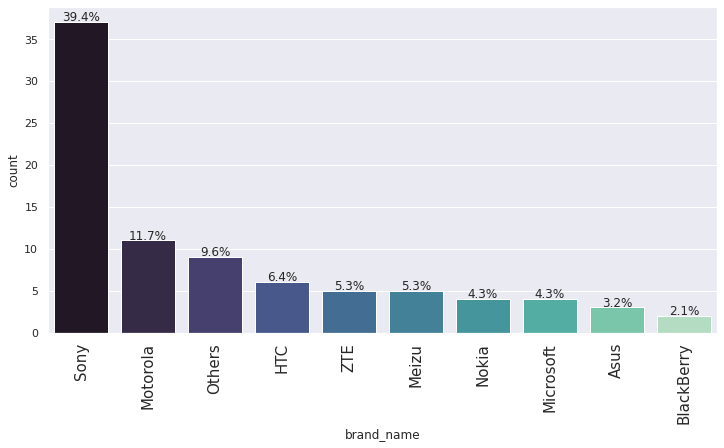

In [ ]:
# Now, we can see the brand distribution for high resolution rear camera devices:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=10)

**Observations:**
- There are **655** devices with the rear camera resolution higher than 16 megapixels.
- Interestingly, the brands that led other factor analysis, as Huawei and Samsung, are not within the top 10 list of this group.
- **Sony** has the majority of the devices in the high resolution rear camera group, 40%, followed by **Motorola** (11.7%) and '**Other**' brands (9.6%).

### <font color='green'>**Used Prices Across the Release Years**</font>

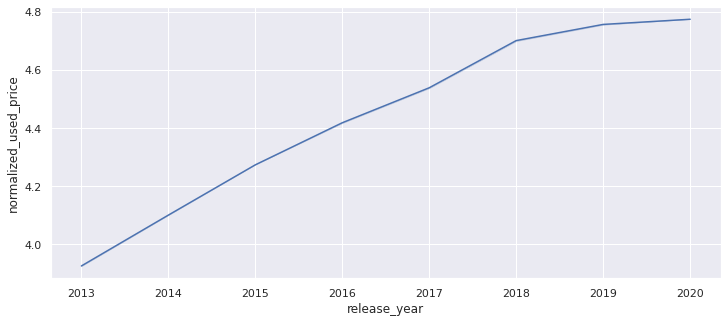

In [ ]:
# Let's check how the prices change based on the release dates of the devices:
plt.figure(figsize=(12, 5))
sns.lineplot(data = df , x = 'release_year' , y = 'normalized_used_price', ci=False);
plt.show()

**Observations:**
- We can clearly observe that newer the release dates of the devices, higher the prices are, with the oldest devices from 2013 costing less than 4.0 euros, and the latest release date devices costing above 4.8 euros.

### <font color='green'>**Used Prices for 4G and 5G Devices**</font>

*Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.*

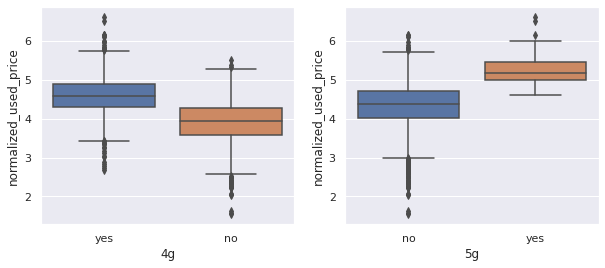

In [ ]:
# We can run boxplots separately for 4G and 5G used prices:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

**Observations:**
- We can clearly observe that the availability of 4G and 5G networks on the devices impact their prices. 
- On average, devices with 4G network vs no 4G network cost more: 4.5 euros vs 4.0 euros respectively.
- The same way, devices with 5G network availability cost more than the devices with less network coverage: 5G devices cost more than 5 euros on average while the devices with no 5G coverage cost the average of 4.5 euros.

**Exploratory Data Analysis Reflections:** 
1.	**What does the distribution of normalized used device prices look like?** - We can see from the visual data that normalized_used_price variable is close to normally distributed, with the mean price being around 4 euros. There are some outliers above the maximum price of 6 euros, and outliers mainly below the minimum value of 1.5 euros.
2.	**What percentage of the used device market is dominated by Android devices?** – Android OS dominates 93% of the used device market. 
3.	T**he amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?** – 4 GB of RAM comprise the 81% of the used device market RAM storage availability. Some brands offers only up to or less than the average 4 GB of RAM storage options: Nokia, Celkon, Infinix; and some brands only go with above average Rams: OnePlus, Oppo, Honor, and Google. Brands, such as Samsung and Huawei have most RAM choices in their device options, varying from the  minimum of 0.02 GB to the maximum of 12 GB of RAM.
4.	**A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?** – Brands such as Motorola, Realme, and Vivo offer the devices with more than 4500 mAh battery power within the weight of 200 grams. Samsung, Asus, Lenovo, and Huawei have more weight options for their battery devices, and Sony, Google and HTC are very limited weight options for their large power battery devices. 
5.	**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?** - There are 1099 devices available with larger than 6*2.54 screen size. Huawei and Samsung are the two brands that offer around 25% of the devices with large screens.
6.	**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?** – There are 655 devices with the more than 8 megapixel front camera and Huawei, Vivo, and Oppo are the three brands that comprise around 40% of the market.  
7.	**Which attributes are highly correlated with the normalized price of a used device?**- Screen size, battery power, and camera (main and selfie) are highly correlated with the normalized_used_prices.


# **Data Preprocessing**

---

---








- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### <font color='green'>**Missing Value Treatment**</font>


We know that the dataset contains some missing data. Now that we have ran the EDA analysis, we can start treating the missing values accordingly.

In [ ]:
# Before we start working on the dataset, we will need to create a copy to keep the original data unchanges:
cdf=df.copy()

In [ ]:
cdf.info()# by running this formula we can double check the data types for assurance.
cdf.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*We will impute the missing values in the data by the column medians grouped by **release_year** and **brand_name**.*

In [ ]:
# We will combine the missing value columns under cols_impute:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# We will impute missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    cdf[col] = cdf[col].fillna(
        value=cdf.groupby(['release_year', 'brand_name'])[col].transform("median")
    )    

# Let's check for missing values again:
cdf.isnull().sum() 

There are still missing values in *main camera mp, selfie camera mp, battery, and weight*.
- We will impute the remaining missing values in the data by the column medians grouped by *brand_name*.

In [ ]:
# We will combine the missing value columns under cols_impute:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# We will impute missing values in cols_impute with median by grouping the data on release year and brand name:
for col in cols_impute:
    cdf[col] = cdf[col].fillna(
        value=cdf.groupby(['brand_name'])[col].transform("median")
    )

# Now, let's check for missing values:
cdf.isnull().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

There are still missing values in *main camera mp* column. We will fill the remaining missing values in the *main_camera_mp* column by the column median.

In [ ]:
cdf['main_camera_mp'] = cdf['main_camera_mp'].fillna(value=cdf['main_camera_mp'].median())
cdf.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**- All the missing values have been treated.**

### <font color='green'>**Feature Engineering**</font>

In [ ]:
#Let's create a new column years_since_release from the release_year column.We will consider the year of data collection, 2021, as the baseline.
cdf["years_since_release"] = 2021 - cdf["release_year"]
#We will drop the release_year column.
cdf.drop("release_year", axis=1, inplace=True)
cdf["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Observations:**
 - All data is included in the new column: 3454 devices with the years since release information.
 - The mean value of the columns is 5 years. The oldest devices are released 8 years ago, and the newest devices are 1 year old.

### <font color='green'>**Outlier Check**</font>

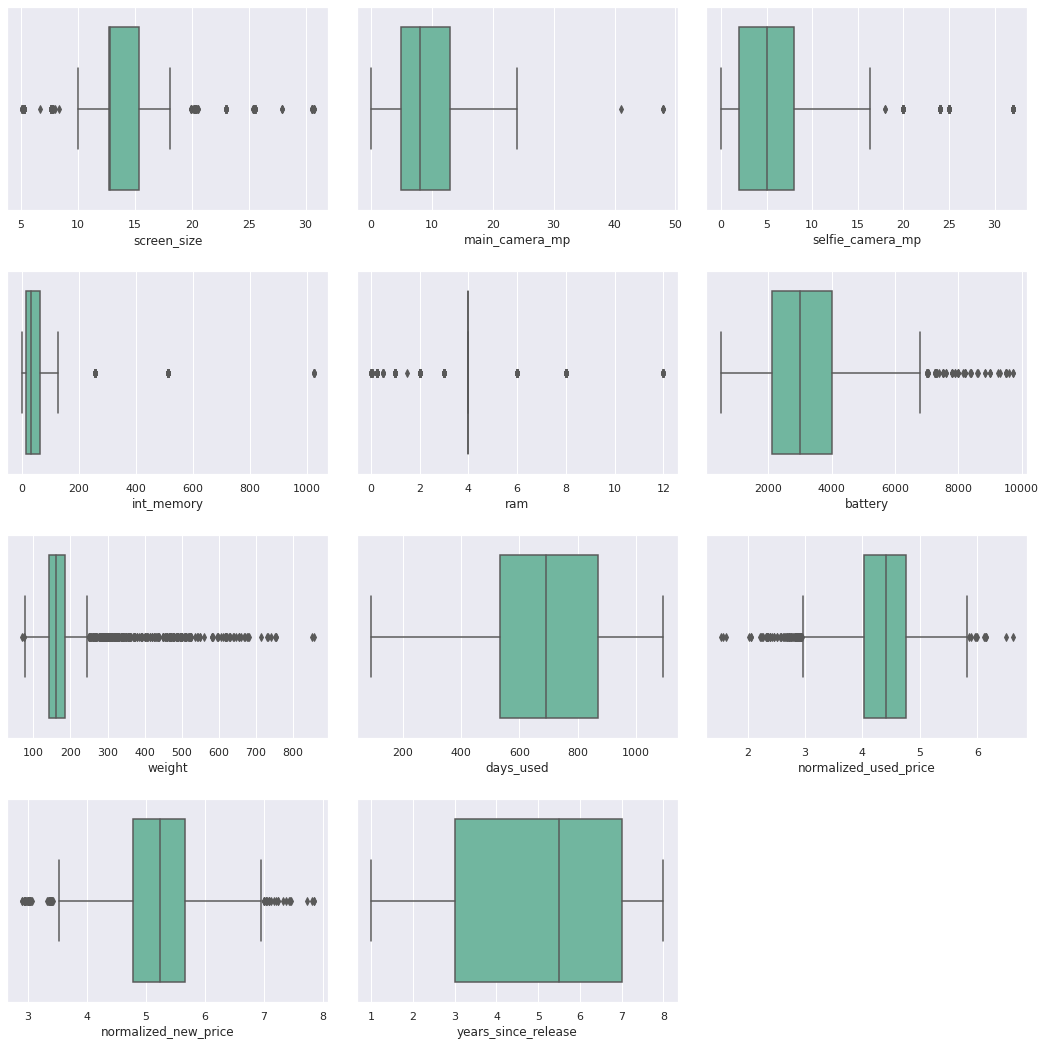

In [ ]:
# Let's check for the outliers using boxplot
num_cols = cdf.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=cdf, x=variable, palette='BuGn')
    plt.tight_layout(pad=2)

plt.show()

**Observations:**
- *Days used* and *years since release* are the only two variables free from any outliers. *Weight*, *Normalized Used price* and *Normalized New Price* are the variables with most outliers in the data: below the minimum and above the maximum values. *Main* and *Selfie Camera MP* and *Int. Memory* variables have a few outliers above the maximum value.
- Although there are a few outliers,they are proper values, so we will not treat them.

### <font color='green'>**Data Preparation for Modeling**</font>

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data


In [ ]:
## First, we will define the dependent and independent variables
X = cdf.drop(['normalized_used_price'], axis=1)
y = cdf['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# Next, let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Now, we will create dummy variables for the categorical variables:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


**We will now split X and Y into train and test sets in a 70:30 ratio. We will use the `train_test_split()` function of sklearn to do the same.**

- In order to train a model properly, we need training and test datasets such that the model can be trained using the train data and can be tested on the unseen test data to get a better understandning of how the model is performing.
- If we have only one dataset provided, we'll need to split it into train and test sets by using the sklearn `train_test_split()` function

In [ ]:
# We will split the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


# **Exploratory Data Analysis-2** (EDA)

---



---



It is a good idea to explore the data once again after manipulating it.

## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="green"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="green"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="mako",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='green'>**Normalized_Used_Price**</font>

Sample Mean = 4.364712079133227
Sample Minimum = 1.536867219599265
Sample Maximum = 6.619433001642933


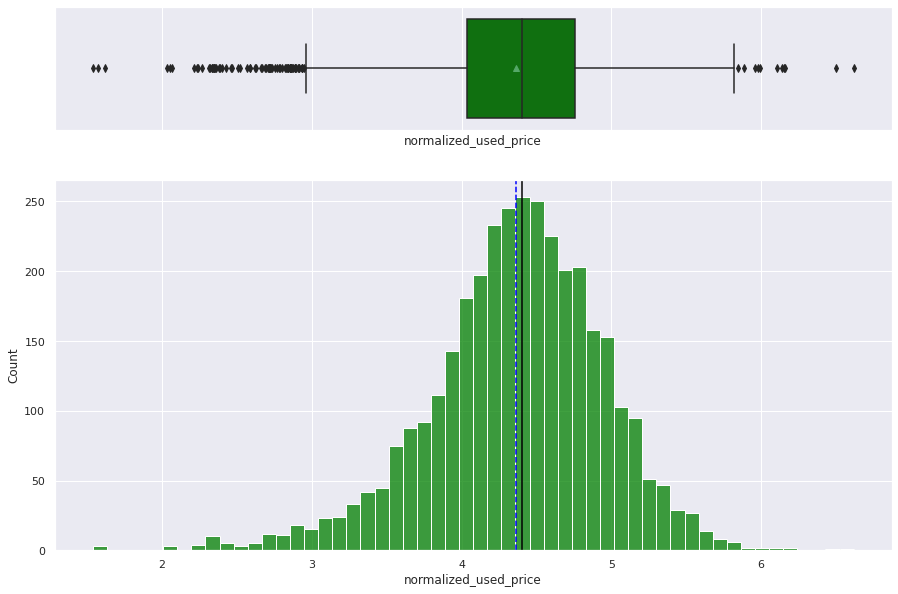

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "normalized_used_price")
print('Sample Mean =',cdf['normalized_used_price'].mean())
print('Sample Minimum =',cdf['normalized_used_price'].min())
print('Sample Maximum =',cdf['normalized_used_price'].max())
plt.show()

**Observations:**
 - The **normalized_used_price** variable is normally distributed as it was before data manipulation.

### <font color='green'>**Normalized_New_Price**</font>

Sample Mean = 5.233107171901414
Sample Minimum = 2.9014215940827497
Sample Maximum = 7.847840659422009


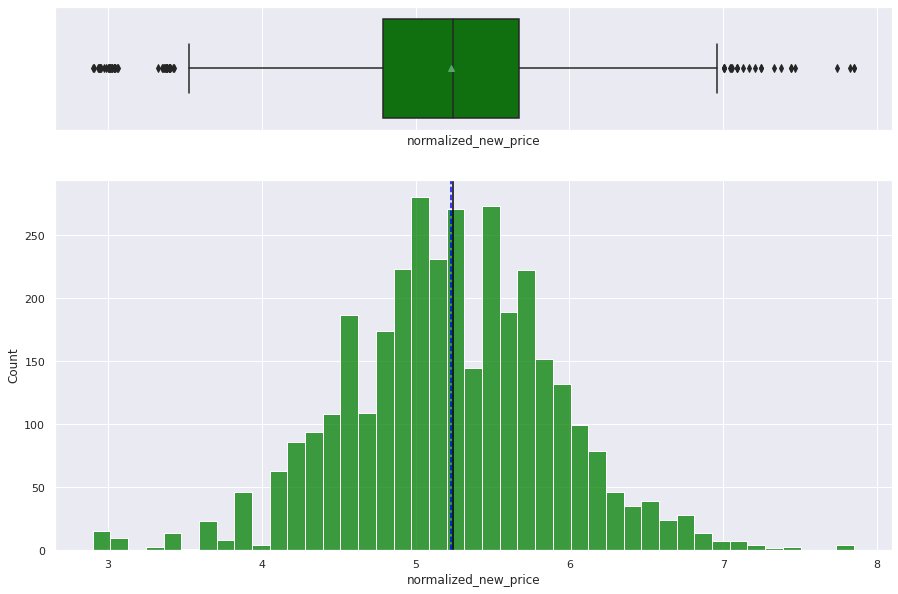

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "normalized_new_price")
print('Sample Mean =',cdf['normalized_new_price'].mean())
print('Sample Minimum =',cdf['normalized_new_price'].min())
print('Sample Maximum =',cdf['normalized_new_price'].max())
plt.show()

**Observations:**

- The **normalized_new_price** variable is considerably normally distributed, with the mean price being around 5 euros. No change after data manipulation.

### <font color='green'>**Screen_Size**</font>

Sample Mean = 13.713115228720325
Sample Minimum = 5.08
Sample Maximum = 30.71


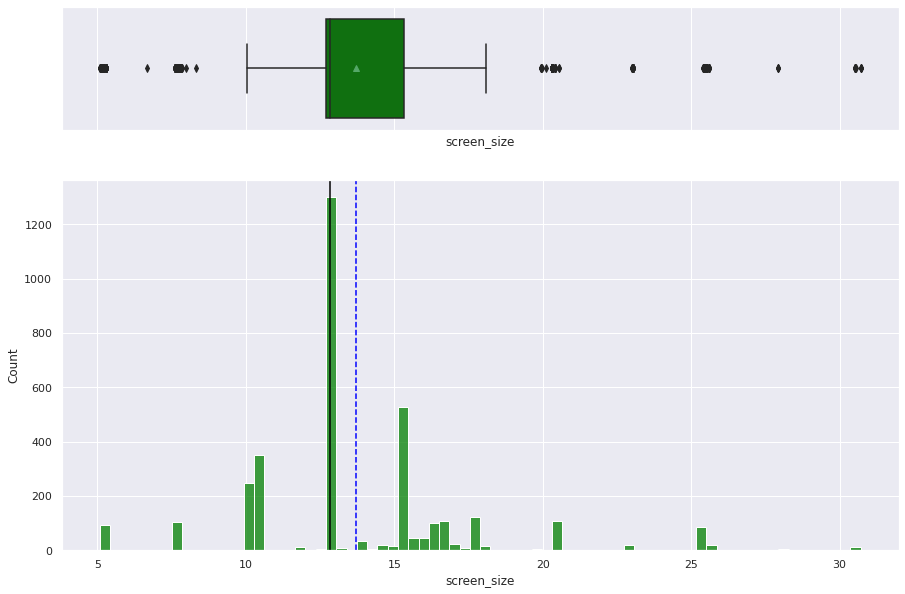

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "screen_size")
print('Sample Mean =',cdf['screen_size'].mean())
print('Sample Minimum =',cdf['screen_size'].min())
print('Sample Maximum =',cdf['screen_size'].max())
plt.show()

**Observations**:
- The **screen_size** variable is positively skewed, as it was before data manipulation.


### <font color='green'>**Main_Camera_MP**</font>

Sample Mean = 9.617596988998265
Sample Minimum = 0.08
Sample Maximum = 48.0


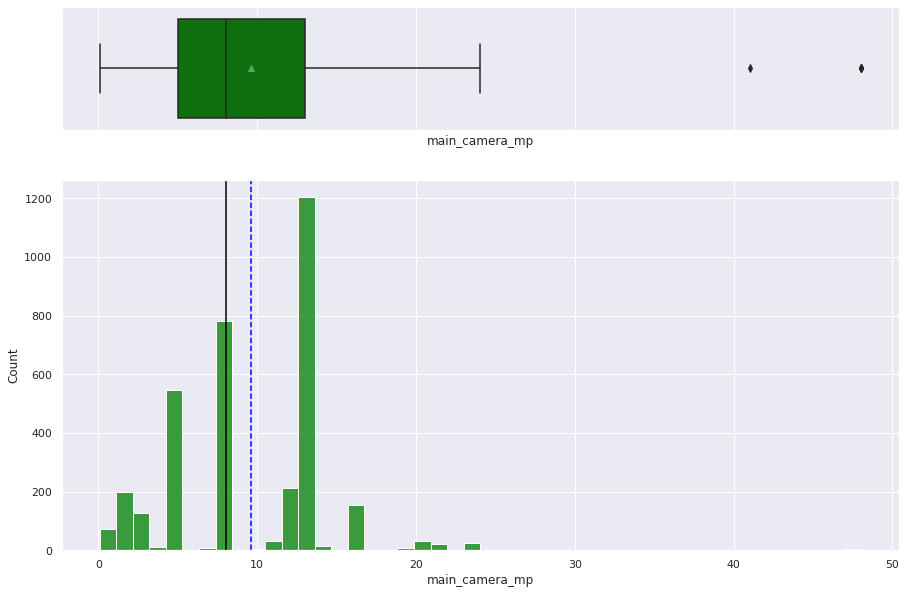

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "main_camera_mp")
print('Sample Mean =',cdf['main_camera_mp'].mean())
print('Sample Minimum =',cdf['main_camera_mp'].min())
print('Sample Maximum =',cdf['main_camera_mp'].max())
plt.show()

**Observations**:
- The **main_camera_mp** variable is  skewed towards right, no change after data manipulation.

### <font color='green'>**Selfie_Camera_MP**</font>

Sample Mean = 6.555066589461493
Sample Minimum = 0.0
Sample Maximum = 32.0


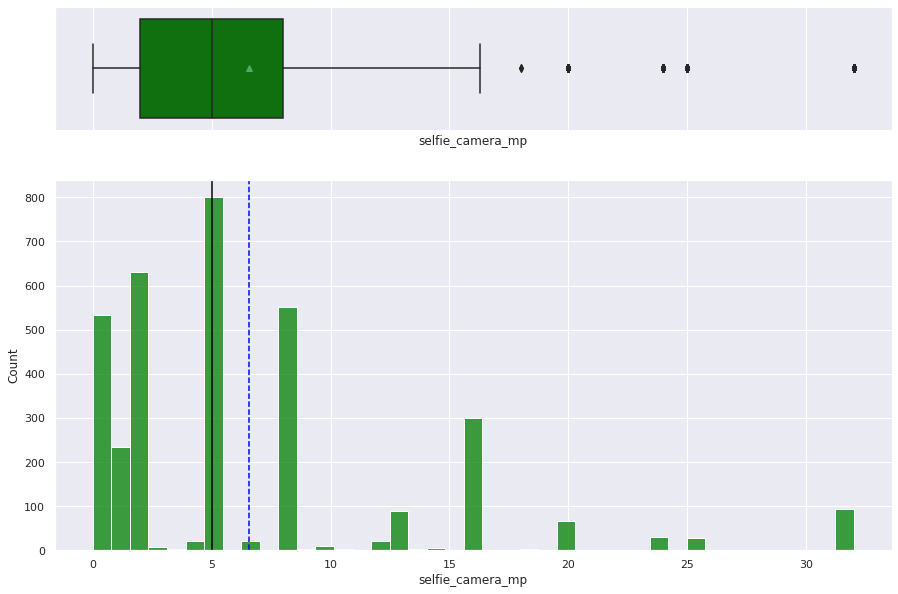

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "selfie_camera_mp")
print('Sample Mean =',cdf['selfie_camera_mp'].mean())
print('Sample Minimum =',cdf['selfie_camera_mp'].min())
print('Sample Maximum =',cdf['selfie_camera_mp'].max())
plt.show()

**Observations:**
- The distribution of the selfie-camera-mp is right-skewed,  no change after data manipulation.

### <font color='green'>**Int_Memory**</font>

Sample Mean = 54.52847423277359
Sample Minimum = 0.01
Sample Maximum = 1024.0


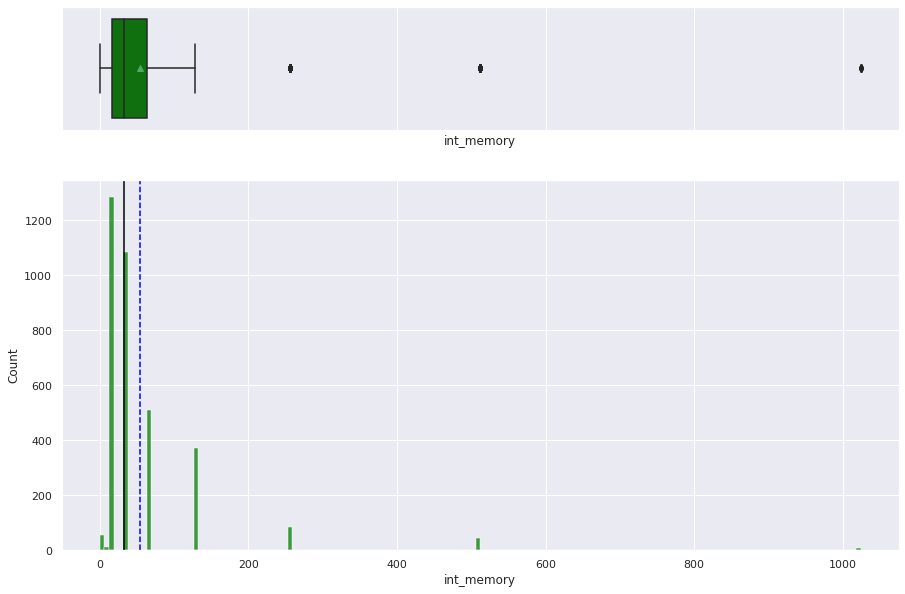

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "int_memory")
print('Sample Mean =',cdf['int_memory'].mean())
print('Sample Minimum =',cdf['int_memory'].min())
print('Sample Maximum =',cdf['int_memory'].max())
plt.show()

**Observations:**
- The data is slightly right-skewed and there are three major outliers that lie far above the maximum int-memory value of ROM in GB. No change after the data modification.


### <font color='green'>**Ram**</font>

In [ ]:
# Let's check the percent share of the RAM values:
cdf['ram'].value_counts(normalize=True)

4.00     0.814997
6.00     0.044586
8.00     0.037638
2.00     0.026636
0.25     0.024030
3.00     0.023451
1.00     0.009844
0.02     0.005501
12.00    0.005211
0.03     0.005211
0.50     0.002606
1.50     0.000290
Name: ram, dtype: float64

Sample Mean = 4.032620150550087
Sample Minimum = 0.02
Sample Maximum = 12.0


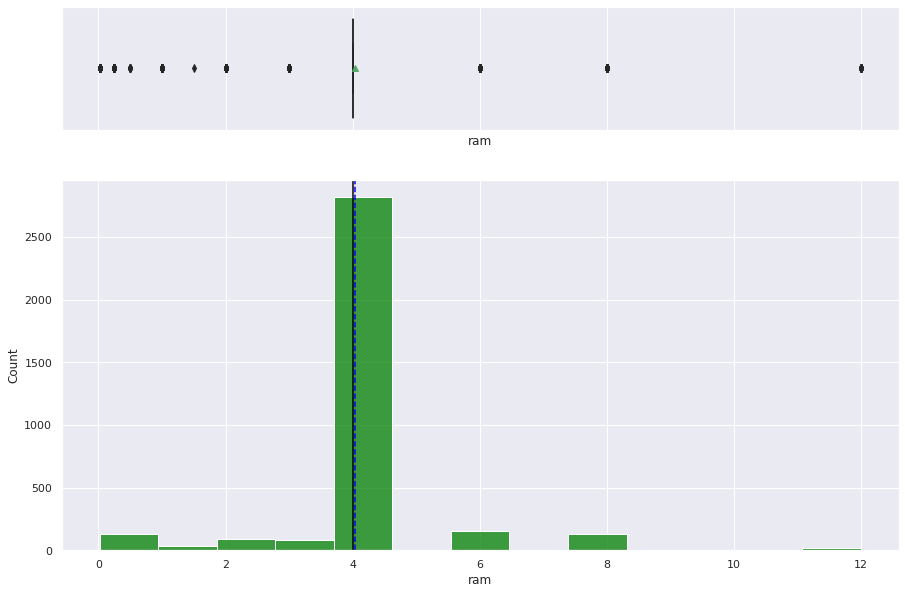

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "ram")
print('Sample Mean =',cdf['ram'].mean())
print('Sample Minimum =',cdf['ram'].min())
print('Sample Maximum =',cdf['ram'].max())
plt.show()

**Observations:**
- 2500 count/81% of the devices have 4 GB of RAM, with a few outliers below and above 4 GB.  No change after data manipulation.

### <font color='green'>**Weight**</font>

Sample Mean = 182.63685581933987
Sample Minimum = 69.0
Sample Maximum = 855.0


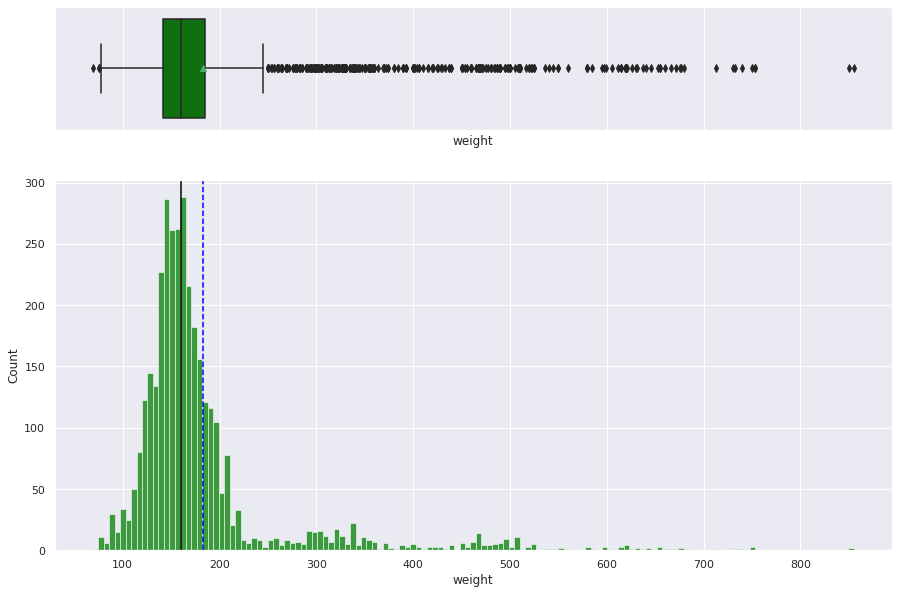

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "weight")
print('Sample Mean =',cdf['weight'].mean())
print('Sample Minimum =',cdf['weight'].min())
print('Sample Maximum =',cdf['weight'].max())
plt.show()

**Observations:**
- The data is almost normally distributed. There are a lot of outliers exceeding the maximum weight of 855 grams.  No change after data manipulation. 


### <font color='green'>**Battery**</font>

Sample Mean = 3132.5774464389115
Sample Minimum = 500.0
Sample Maximum = 9720.0


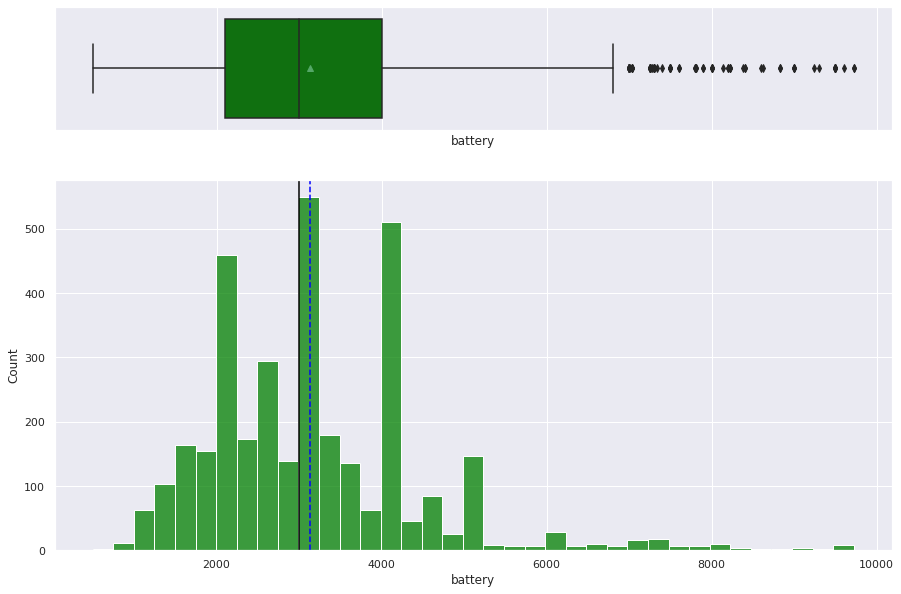

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "battery")
print('Sample Mean =',cdf['battery'].mean())
print('Sample Minimum =',cdf['battery'].min())
print('Sample Maximum =',cdf['battery'].max())
plt.show()

**Observations:**
 - The battery power is slightly right skewed, with the mean power being 3133 mAh. There are outliers the lie above the maximum of 9720 mAh. No change after data manipulation.

### <font color='green'>**Days Used**</font>

Sample Mean = 674.8697162709901
Sample Minimum = 91
Sample Maximum = 1094


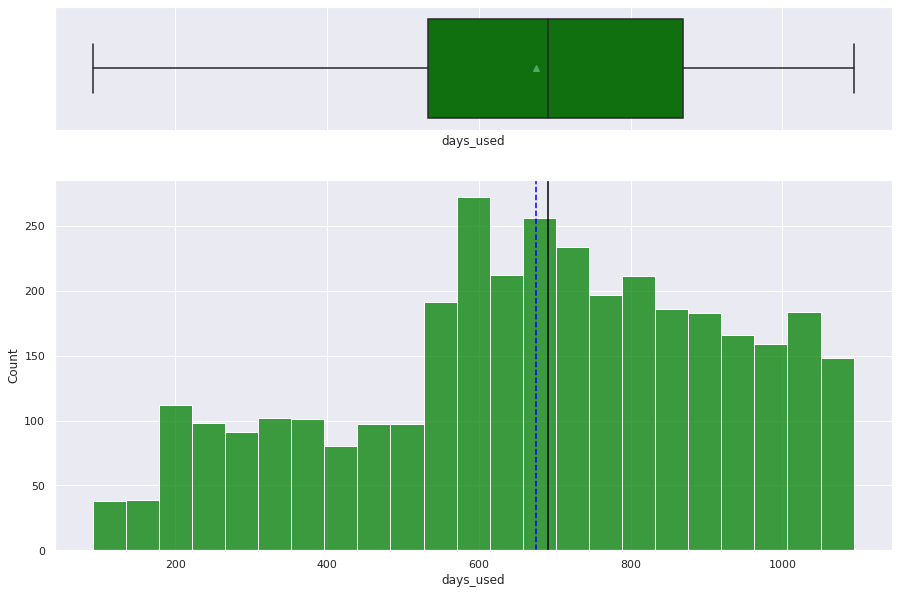

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
histogram_boxplot(cdf, "days_used")
print('Sample Mean =',cdf['days_used'].mean())
print('Sample Minimum =',cdf['days_used'].min())
print('Sample Maximum =',cdf['days_used'].max())
plt.show()

**Observations:**

- We have dropped released year and modified the data to the days used.The days used distribution is skewed to the left, meaning the most of the values lie above the average days of 674 days of usage. With the minimum and maximum usage days being 91 and 1094 respectfully, there are not outliers in the dataset.

### <font color='green'>**Brand Name**</font>

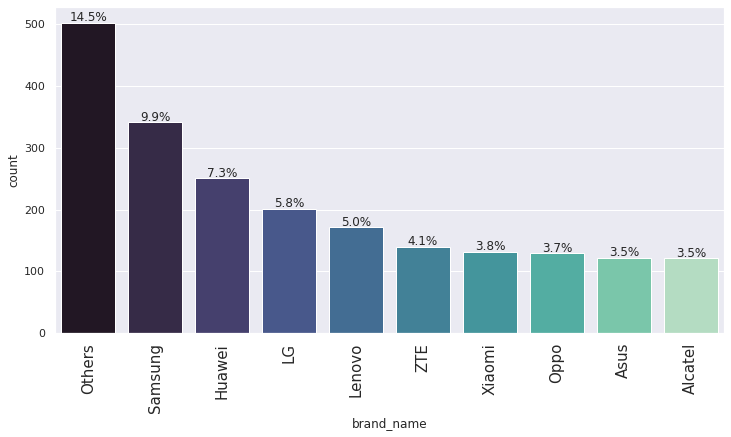

<IPython.core.display.Javascript object>

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(cdf, "brand_name", perc=True, n=10)

**Observations:**
- The is no change in the brand name distribution in the used devices market.

### <font color='green'>**OS**</font>

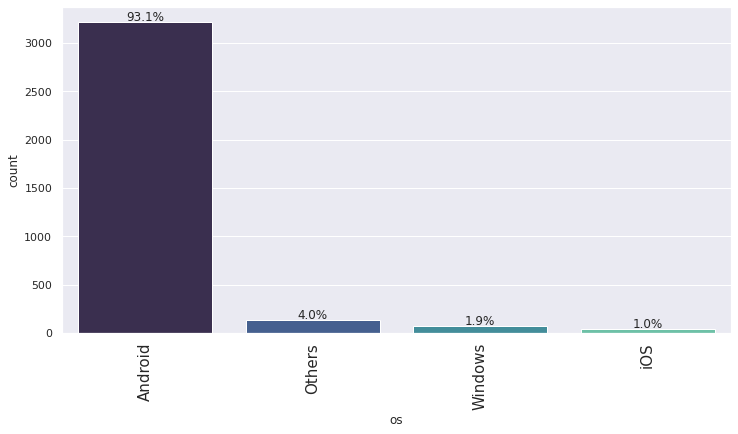

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(cdf, "os", perc=True, n=10)

**Observations:**
- The is no change in the OS distribution in the used devices market.

### <font color='green'>**4g**</font>

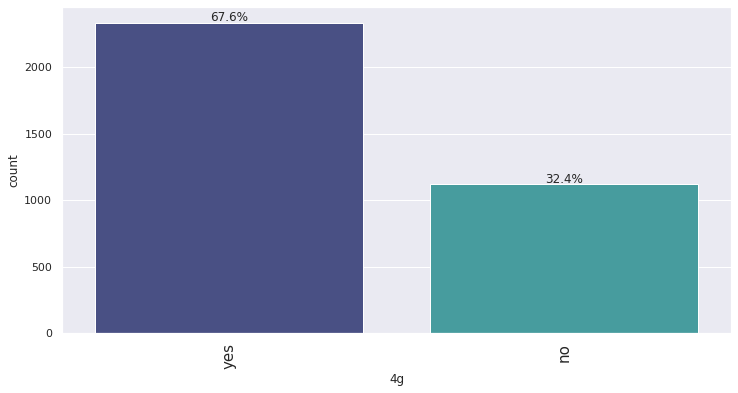

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(cdf, "4g", perc=True, n=10)

**Observations:**
- 4G network is available in 67.6% of the devices.

### <font color='green'>**5g**</font>

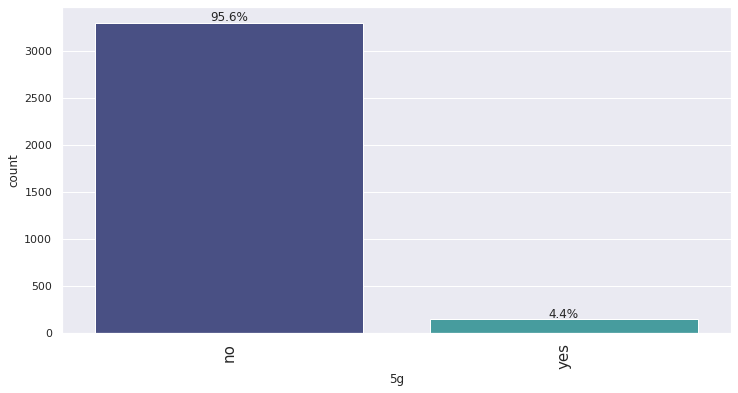

In [ ]:
# We will create the barplot to see the distribution of the categorical variable:
labeled_barplot(cdf, "5g", perc=True, n=10)

**Observations:**
 - Only 4.4% of the devices in the market have the 5G network availability.

## **Bivariate Analysis**

### <font color='green'>**Correlation Check**</font>

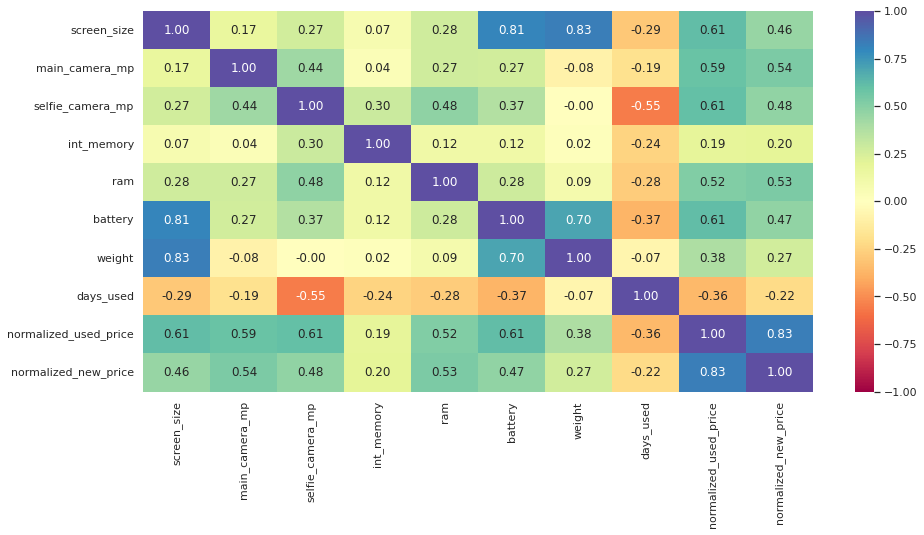

In [ ]:
cols_list = cdf.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("years_since_release")
plt.figure(figsize=(15, 7))
sns.heatmap(
    cdf[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- The highest correlations exist in  normalized_new_ price vs normalized_used_price; battery power vs screen size, and device weight vs screen size. 

- Screen size, battery power, and camera (main and selfie) have stronger correlations to the normalized_used_prices than to the normalized_new_prices. Main camera mp and RAM seem to be the two variables that have stronger correlation to the normalized_new_prices.

- Days_of_use has a negative correlation to the price of the used devices, as well as to all other variables across the dataset.


### <font color='green'>**Used Prices Across Years Since Release**</font>

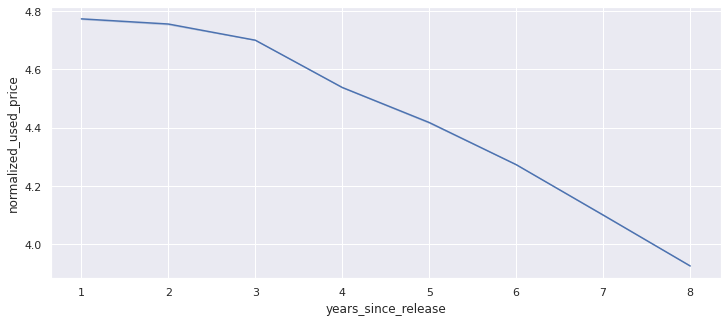

In [ ]:
# Let's check how the prices change based on the years since release of the devices:
plt.figure(figsize=(12, 5))
sns.lineplot(data = cdf , x = 'years_since_release' , y = 'normalized_used_price', ci=False);
plt.show()

**Observations:**
- Since we converted the release year value to the years since release, the graph has changed accordingly: older the devices, the lower the prices are.

**Double Checking the EDA Conclusion:** 
The EDA results after data manipulations did not show any noticable changes.

# **Model Building - Linear Regression**

---



---







We will use the [`OLS()`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) function of the statsmodels library to fit the linear model.

- Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration

- The `OLS()` function of the statsmodels.api module is used to perform OLS (Ordinary Least Squares) regression. It returns an OLS object

- The `fit()` method is called on this object for fitting the regression line to the data

- The `summary()` method is used to obtain a table which gives an extensive description about the regression results

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
# We will print the regression summary now:
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                           18:05:23   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### **Interpreting the Regression Results:**

 - **Adjusted. R-Squared** reflects the fit of the model. The values range between 0 and 1, with higher value generally indicating a better fit. In this case, adj. R-squared is 0.842, which is a very good indicator. This means our model can explain 84% of the variance in the training set.
    
 -  ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156 - 
    
- **Coefficient of a predictor variable:**  - the coefficient tell us how a change in X impact y and the sign of the coefficient shows if the relationship is positive or negative.
   - If we take some examples, an increase in screen size occurs with 0.0244 increase in the used devices pricing. An increase in years since release occurs with the -0.0237  decrease in the pricing. As we have seen in EDA, the increase in front and main camera, ram, and weight variables relates to positive increase in the pricing trends. 



# **Model Performance Check**

---



---







**Let's check the performance of the model using different metrics**.

- We will be using metric functions defined in sklearn for RMSE, MAE, and  R2 .
- We will define a function to calculate MAPE and adjusted  R2 .
-We will create a function which will print out all the above metrics.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Let's check the model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# Let's check the model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations:**
 - The training R-squared is 0.84. The model is not underfitting.
 - The train and test RMSE and MAE are comparable. This means the model is not overfitting.
 - MAE suggests that the model can predict the price of a used phone/tablet market with a mean error of 0.18 on the test data.
 - MAPE of 4.5% on the test data means that we are able to predict within 4.5% of the used devices pricing rate.


# **Checking Linear Regression Assumptions**

---



---



- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1.   **No Multicollinearity**
2.   **Linearity of variables**
3. **Independence of error terms**
4. **Normality of error terms**
5. **No Heteroscedasticity** 



### <font color='green'>**TEST FOR MULTICOLLINEARITY**</font>

**What is Multicollinearity and How to Detect It?**

* **Multicollinearity** occurs when predictor variables in a regression model are correlated. This correlation creates problem because predictor variables are ex[ected to be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results and the coefficients that the model suggests would be unreliable.

* There are different ways of detecting (or testing) multicollinearity. One way is by using the Variance Inflation Factor, or **VIF**.


- **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.
We will test for multicollinearity using VIF.

**Rules to Consider:**

- If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
- If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
- If VIF is 10 or exceeding 10, it shows 
signs of high multicollinearity.

*Let's define a function to check VIF.*

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


**Observations:**

- There are a few columns with moderate and high VIF values, which indicate the presence of multicollinearity.
- We will ignore the VIF values for the constant and the dummy variables and will systematically drop numerical columns with VIF >5

### <font color='green'>**Removing Multicollinearity**</font>

To remove multicollinearity we will:

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5. 

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size','weight'] 
# Let's check the effect on model performance after dropping specified columns from train data:
res = treating_multicollinearity(x_train, y_train, col_list)  
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
col_to_drop = "screen_size"
x_train1 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test1 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


**Observations:**
* We can see that none of the numeric variables show neither moderate nor high multicollinearity, so we can proceed with the next steps.


In [ ]:
# Let's rebuild the model using the updated set of predictors variables
olsmod1 = sm.OLS(y_train, x_train1).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                           18:09:12   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### <font color='green'>**Interpretation of p-values (P > |t|)**</font>

Since we have treated our data from multicollinearity, we can now interpret the p-values:

**P>|t|** gives the p-value for each predictor variable to check the null hypothesis:

- $H_o$ : Predictor variable is not significant 
- $H_a$ : Predictor variable is significant

We are considering **0.05** (5%) as significance level. A p-value of less than 0.05 is considered to be statistically significant.


### <font color='green'>**Dealing with high p-value variables**</font>

- As we can see from the model above, some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
  - Repeat the above two steps till there are no columns with p-value > 0.05


In [ ]:
# Let's see which columns have the high p-values and then remove the values greater than 0.05.
# initial list of columns
predictors = x_train1.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# Let's redefine our test and train data sets with the adjusted columns:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [ ]:
# Let's run our model again, naming it olsmod2:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                           18:11:48   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**

- After dropping the statistically insignificant variables, our performance model has not dropped: adj. R-squared in olsmod1  was **0.838**, and is still **0.838** in olsmod2. This shows that the variables we dropped were not affecting the model.
-Now no feature has p-value greater than 0.05, so we'll consider the features in **x_train2** as the final set of predictor variables and **olsmod2** as the final model to move forward with.
- Now adjusted R-squared is 0.838, meaning that our model is able to explain ~83% of the variance. 
- **RMSE** and **MAE** values are comparable for train and test sets, indicating that the model is not overfitting.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### <font color='green'>**TEST FOR LINEARITY AND INDEPENDENCE**</font>

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How do we fix if this assumption is not met?**

- We can attempt to transform the variable to make the relationships linear.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


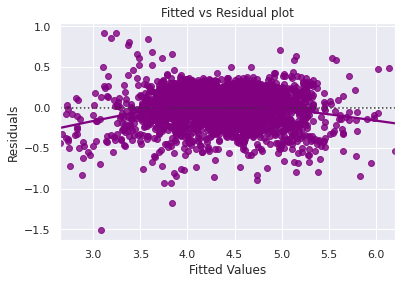

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* **We see no pattern in the plot above, which is a sign of non-linearity in the data. Hence, the assumptions of linearity and independence are satisfied.**

### <font color='green'>**TEST FOR NORMALITY**</font>

**Why the test?**

* Residuals/error terms should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. 

**What does non-normality mean?**

Non-normality indicate that there are a few unusual data points that must be studied closely to make a better model.

**How do we check the Normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

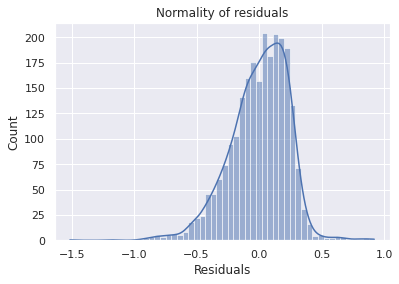

In [ ]:
# We will run a histplot to check the distribution of residuals:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations:**
- The histogram of residuals does have a bell shape, meaning the residual terms are normally distributed.


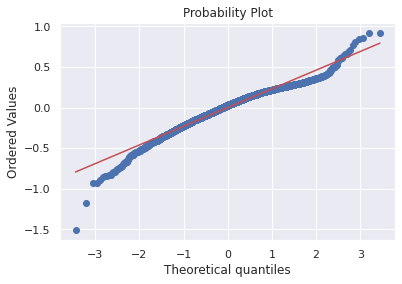

In [ ]:
#Let's check the Q-Q plot:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:**
- The residuals more or less follow a straight line except for the tails.


In [ ]:
#Let's check the results of the Shapiro-Wilk test:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Although the residuals are not normal, as an approximation, we would want to accept this distribution as close to being normal.
- **We accept the assumption as satisfied.**

### <font color='green'>**TEST FOR HOMOSCEDASTICITY**</font>

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Non-constant variance, generally, arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.


- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## **All the assumptions of linear regression are now satisfied.** 


In [ ]:
# Let's check the summary of our final model (olsmod2)
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                           18:18:50   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Let's check the model parameters:
olsmod2.params

const                   1.499981
main_camera_mp          0.020967
selfie_camera_mp        0.013827
ram                     0.020713
weight                  0.001662
normalized_new_price    0.441472
years_since_release    -0.029170
brand_name_Karbonn      0.115598
brand_name_Samsung     -0.037423
brand_name_Sony        -0.066993
brand_name_Xiaomi       0.080068
os_Others              -0.127575
os_iOS                 -0.090006
4g_yes                  0.050213
5g_yes                 -0.067259
dtype: float64

In [ ]:
# Let us write the equation of linear regression
Equation = "Used Prices ="
print(Equation, end=" ")
for i in range(len(x_train2.columns)):
    if i == 0:
        print(olsmod2.params[i], "+", end=" ")
    elif i != len(x_train2.columns) - 1:
        print(
            olsmod2.params[i],
            "* (",
            x_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod2.params[i], "* (", x_train2.columns[i], ")")

Used Prices = 1.4999812451972678 + 0.020967228790752756 * ( main_camera_mp ) +  0.013827288876828847 * ( selfie_camera_mp ) +  0.02071270165714739 * ( ram ) +  0.0016616476692227972 * ( weight ) +  0.44147230022363776 * ( normalized_new_price ) +  -0.02916976367153912 * ( years_since_release ) +  0.11559844506476562 * ( brand_name_Karbonn ) +  -0.03742329934072859 * ( brand_name_Samsung ) +  -0.06699285130111647 * ( brand_name_Sony ) +  0.080068406958043 * ( brand_name_Xiaomi ) +  -0.12757512561897857 * ( os_Others ) +  -0.09000552317649045 * ( os_iOS ) +  0.050213451529782745 * ( 4g_yes ) +  -0.06725868426972223 * ( 5g_yes )


**Observations:**

- The R-squared of the final model is 0.839 and the adjusted R-squared is 0.838, which means our model is able to explain about 84% variance of the data.
- A unit increase in main camera will result in a 0.0209 increase in the device pricing. A unit increase in selfie camera will result in a 0.0138 increase in the device pricing.
- The brand name Karbonn will have an  0.1155 increase in the prices, higher than other brands in the market.
- A year since release will decrease the price to -0.0291.
- Increase in the new prices will result in 0.4414 increase in the used devices prices.

# **Predictions on test data**

---



---






Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


**Obervations:**
- The actual and predicted values are very much comparable, so our model turned out very good.

# **Final Model**

---



---



Let's recreate the final model and print it's summary to gain insights.

In [ ]:
# Let's label our final data sets:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                           18:20:40   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Let's check again our model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE (Mean Absolute Percentage Error) on the test set suggests that our predictions are around 4.5% away from the expected values, which is very good.

* We can conclude the model ***olsmodel_final*** is good for prediction as well as inference purposes

# **Actionable Insights and Recommendations** 

---



---



1. The model is able to explain **~84%** of the variation in the data and within **4.5%** of the used prices rates on the test data. This indicates that the model is good for prediction as well as for inference purposes.

2. If the **main** and **selfie camera** of a used device increase by one unit, then its pricing will increase by **0.0209** and **0.0138** respectfully, all other variables held constant.


3. If the **ram** of a used device increases by one unit,then the pricing will increase by **0.0207**, all other variables held constant.


4. The **weight** of the used devices have an impact on the predicted pricing, such as a unit increase in the weight of a device will increase the price by **0.0016**, all other variables held constant.


5. With each unit increase in the **new device pricing**, the used device price will increase by **0.4414**, all other variables held constant.


6. With each **year passing since release** of a device, the price will drop by **-0.0291**, all other variables held constant.It is recommended to keep the used device stocks with updates releases.   


7. Main and Selfie camera quality and the amount of RAM in the devices seem to be very important factors in the pricing rates of used devices. Focusing on these device features will help to keep the market aligned with the demand and competative pricing. 

8. ReCell can look into focusing on the brand names that offer more impactful features: RAM choices, camera quality, and 4G/5G network availability, such as Samsung, Huawei, Vivo, Oppo, and Xiaomi. 


9. 4G network available devices comprise almost 68% of the used devices market and addition to this quality will affect the pricing with as much as 0.0502 increase. Knowing the fact that 5G network available devices cost more than 5 euros on average, we can conclude that in general, the availability of 4G/5G is a big factor in the used devices pricing rates. 

10. Dropping the brand names that are outdated from the market needs and also affect the price increase, such as Karbonn, could be an effective strategy for ReCell. For example, from EDA analysis we observed that only around 19% if the used devices have high resolution main and selfie cameras. Offering in demand device features, such as camera quality, will help to keep the market competitive to the new device market. 


___

In [ ]:
%%shell
jupyter nbconvert --to html //content/Full_Code_Project_3_MO_Final.ipynb

[NbConvertApp] Converting notebook //content/Full_Code_Project_3_MO_Final.ipynb to html
[NbConvertApp] Writing 1861728 bytes to //content/Full_Code_Project_3_MO_Final.html
